In [232]:
#importing packages for performing algebric operations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pyarrow.parquet as pq
import gc
import numpy as np # linear algebra
import pandas as pd


In [233]:
#importing the datasets for train data and test data
train_meta_df = pd.read_csv("/content/shared_articles.csv")
test_meta_df = pd.read_csv("/content/users_interactions.csv")

In [176]:
print("metadata_train shape is {}".format(train_meta_df.shape))#printing the meta data of the dataset
print("metadata_test shape is {}".format(test_meta_df.shape))#printing the meta data the dataset

metadata_train shape is (99, 67)
metadata_test shape is (99, 8)


In [177]:
train_meta_df.head(6) #checking the first 6 columns of the dataset

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1459192779,CONTENT REMOVED,-6.45131E+18,4.34031E+18,8.94034E+18,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1459193988,CONTENT SHARED,-4.11035E+18,4.34031E+18,8.94034E+18,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1459194146,CONTENT SHARED,-7.29229E+18,4.34031E+18,8.94034E+18,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1459194474,CONTENT SHARED,-6.15185E+18,3.89164E+18,-1.45753E+18,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1459194497,CONTENT SHARED,2.44803E+18,4.34031E+18,8.94034E+18,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1459194522,CONTENT SHARED,-2.82657E+18,4.34031E+18,8.94034E+18,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
test_meta_df.head(6) #checking the first 6 columns of the dataset

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3.499920e+18,-8.845300e+18,1.264200e+18,NaN,NaN,NaN
1,1465412560,VIEW,8.890720e+18,-1.032020e+18,3.621740e+18,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,3.105150e+17,-1.130270e+18,2.631860e+18,NaN,NaN,NaN
3,1465413895,FOLLOW,3.105150e+17,3.442810e+17,-3.167640e+18,NaN,NaN,NaN
4,1465412290,VIEW,-7.820640e+18,-4.453370e+17,5.611480e+18,NaN,NaN,NaN
5,1465413742,VIEW,3.105150e+17,-8.763400e+18,1.395790e+18,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR


In [179]:
train_meta_df.isnull().sum() #checking null values

timestamp           0
eventType           0
contentId           0
authorPersonId      0
authorSessionId     0
                   ..
Unnamed: 62        98
Unnamed: 63        98
Unnamed: 64        98
Unnamed: 65        98
Unnamed: 66        98
Length: 67, dtype: int64

In [180]:
test_meta_df.isnull().sum() #checking null values

timestamp       0
eventType       0
contentId       0
personId        0
sessionId       0
userAgent      44
userRegion     44
userCountry    44
dtype: int64

<Axes: xlabel='contentId', ylabel='count'>

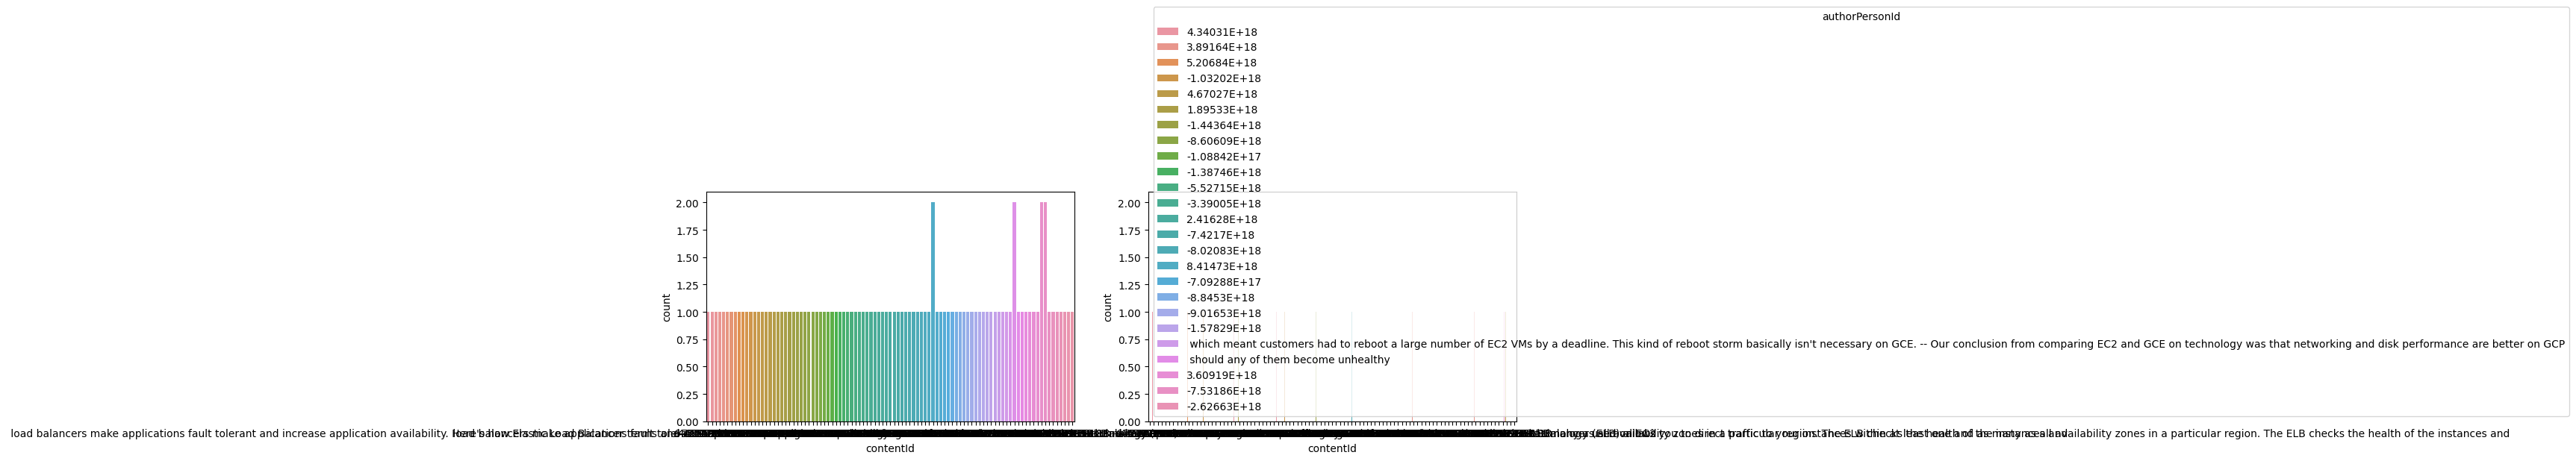

In [181]:
#plotting of label data (ContentID) and (authorPersonId)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="contentId", data=train_meta_df, ax=ax1)
sns.countplot(x="contentId", data=train_meta_df, hue="authorPersonId", ax=ax2)

<Axes: xlabel='contentId', ylabel='count'>

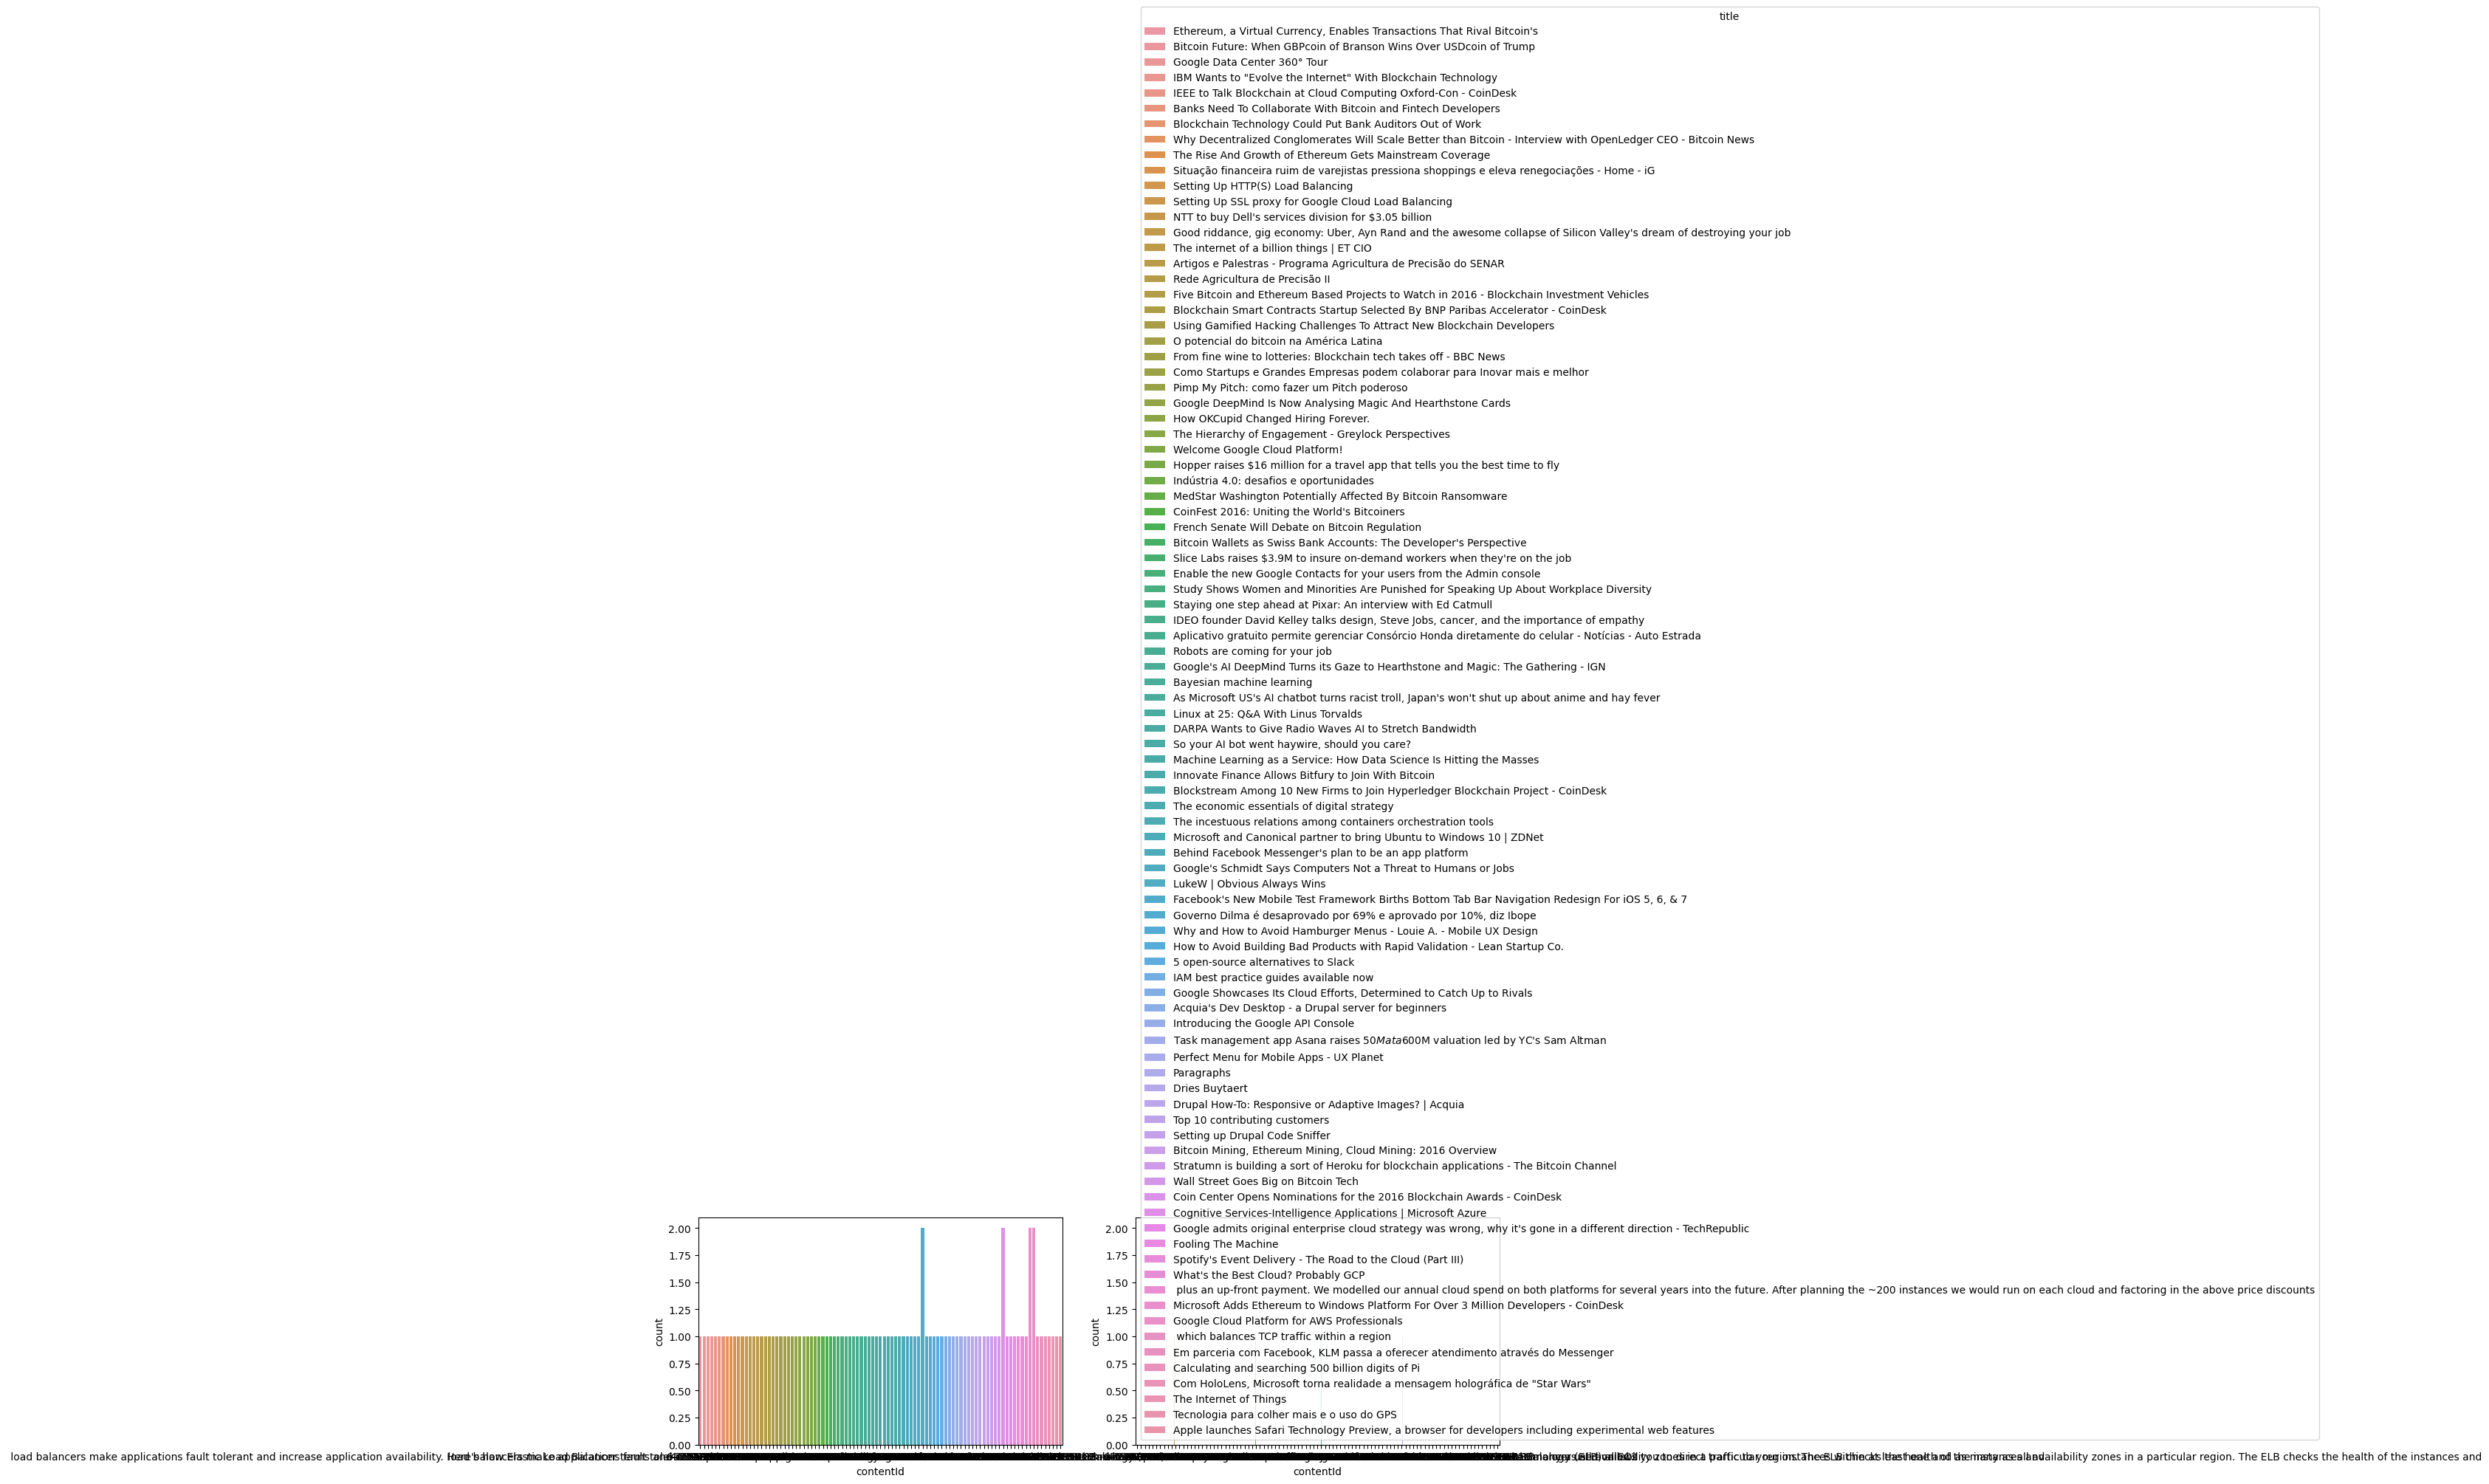

In [182]:
##subplotting of label data (ContentID)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="contentId", data=train_meta_df, ax=ax1)
sns.countplot(x="contentId", data=train_meta_df, hue="title", ax=ax2)


<Axes: >

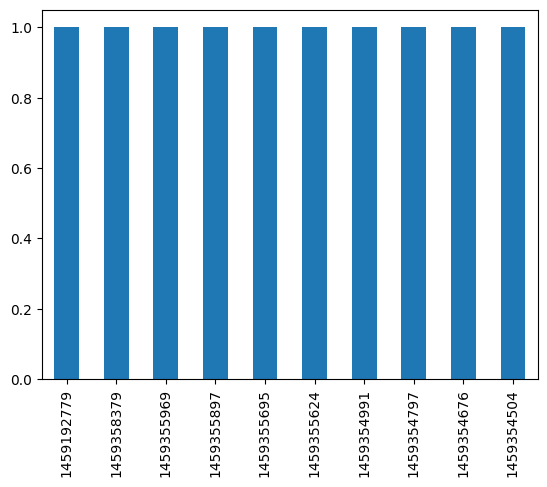

In [183]:
train_meta_df['timestamp'].value_counts().head(10).plot.bar() #bar plots of 'timestamp'

In [184]:
cols = ['userRegion', 'sessionId']
test_meta_df =test_meta_df.drop(cols , axis =1)

In [185]:
print (test_meta_df) #column after drooping two columns as mentiine in the code syntax

     timestamp eventType     contentId      personId  \
0   1465413032      VIEW -3.499920e+18 -8.845300e+18   
1   1465412560      VIEW  8.890720e+18 -1.032020e+18   
2   1465416190      VIEW  3.105150e+17 -1.130270e+18   
3   1465413895    FOLLOW  3.105150e+17  3.442810e+17   
4   1465412290      VIEW -7.820640e+18 -4.453370e+17   
..         ...       ...           ...           ...   
94  1460565500      VIEW  4.761910e+18  3.429600e+18   
95  1460566206      VIEW  1.431350e+18 -2.626630e+18   
96  1460566393      LIKE -6.929720e+17 -1.602830e+18   
97  1460570179      VIEW -8.971090e+18 -1.443640e+18   
98  1460568694      VIEW -2.181070e+18 -1.443640e+18   

                                            userAgent userCountry  
0                                                 NaN         NaN  
1   Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...          US  
2                                                 NaN         NaN  
3                                                 NaN  

     timestamp eventType     contentId      personId     sessionId  \
0   1465413032      VIEW -3.499920e+18 -8.845300e+18  1.264200e+18   
1   1465412560      VIEW  8.890720e+18 -1.032020e+18  3.621740e+18   
2   1465416190      VIEW  3.105150e+17 -1.130270e+18  2.631860e+18   
3   1465413895    FOLLOW  3.105150e+17  3.442810e+17 -3.167640e+18   
4   1465412290      VIEW -7.820640e+18 -4.453370e+17  5.611480e+18   
..         ...       ...           ...           ...           ...   
94  1460565500      VIEW  4.761910e+18  3.429600e+18 -8.094680e+17   
95  1460566206      VIEW  1.431350e+18 -2.626630e+18 -8.667090e+18   
96  1460566393      LIKE -6.929720e+17 -1.602830e+18  6.423950e+18   
97  1460570179      VIEW -8.971090e+18 -1.443640e+18 -7.298020e+18   
98  1460568694      VIEW -2.181070e+18 -1.443640e+18 -7.298020e+18   

                                            userAgent userRegion userCountry  
0                                                 NaN        NaN         NaN  
1

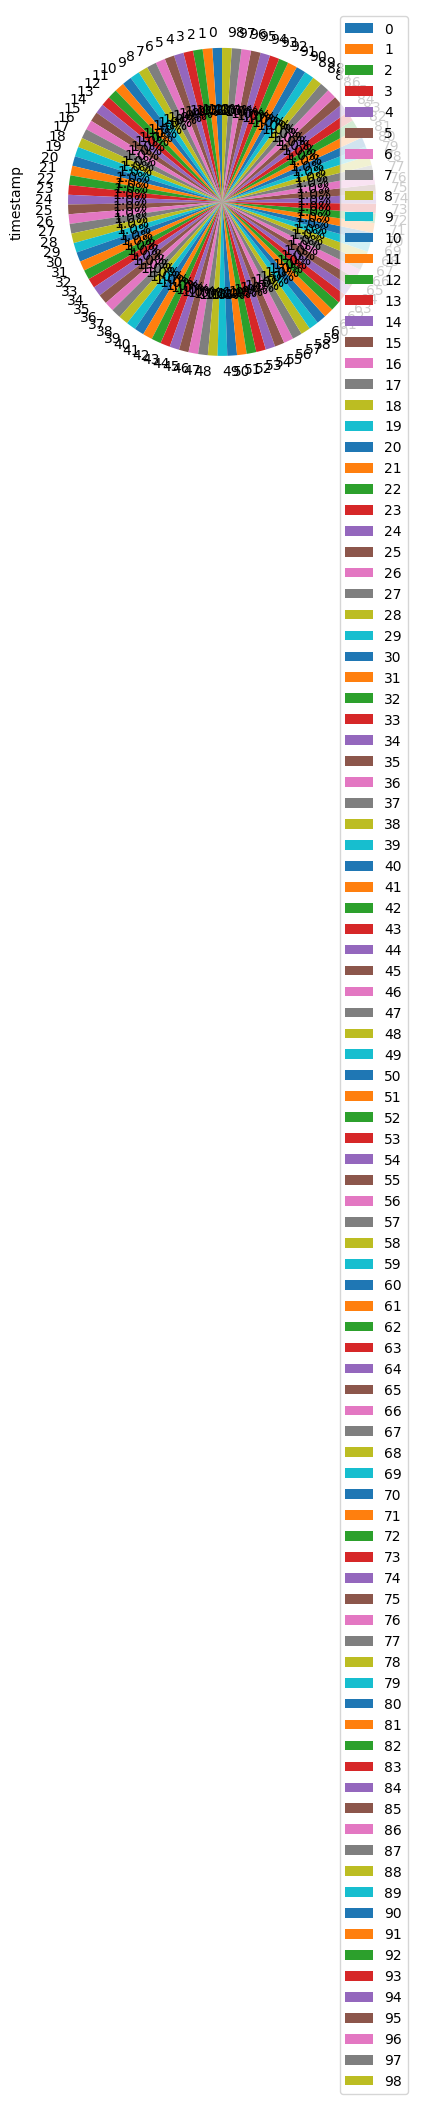

In [186]:
#plotting a pie chart with the dataset
import pandas as pd

data = pd.read_csv("/content/users_interactions.csv")
test_meta_df = pd.DataFrame(data)

print(test_meta_df)
test_meta_df.plot.pie(y='timestamp', figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.show()

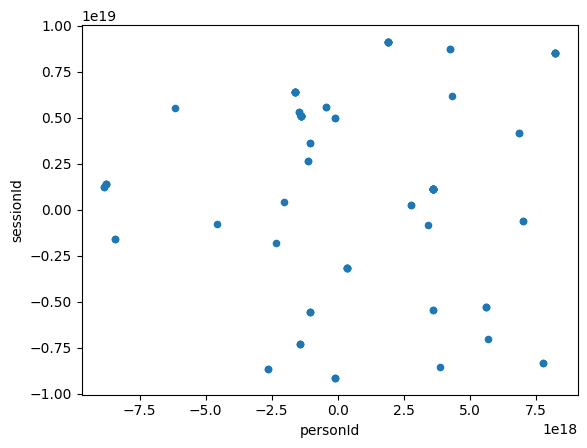

In [187]:
#plotting a scatter chart with the dataset
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/users_interactions.csv")
test_meta_df = pd.DataFrame(data)
test_meta_df = pd.DataFrame(data)
test_meta_df.plot(x='personId', y='sessionId', kind='scatter')
plt.show()

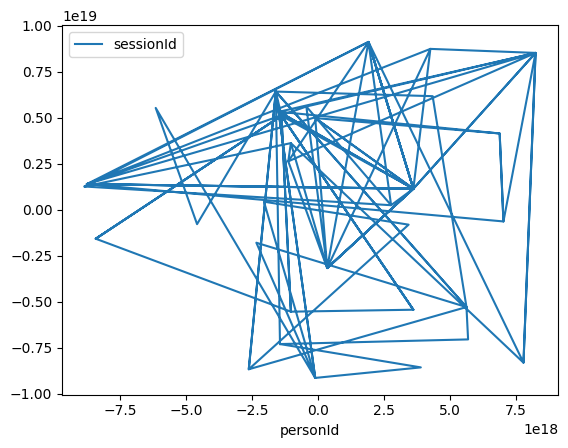

In [188]:
#plotting a line chart with the dataset
from IPython.testing import test
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/users_interactions.csv")

test_meta_df = pd.DataFrame(data)
test_meta_df.plot(x='personId', y='sessionId', kind='line')
plt.show()

In [189]:
#creation of dummy variables
import pandas as pd
import numpy as np

test_meta_df = pd.DataFrame({'Customer': ['Name', 'address', 'contact'],
                   })
pd.get_dummies(test_meta_df)


,Customer_Name,Customer_address,Customer_contact
0,1,0,0
1,0,1,0
2,0,0,1


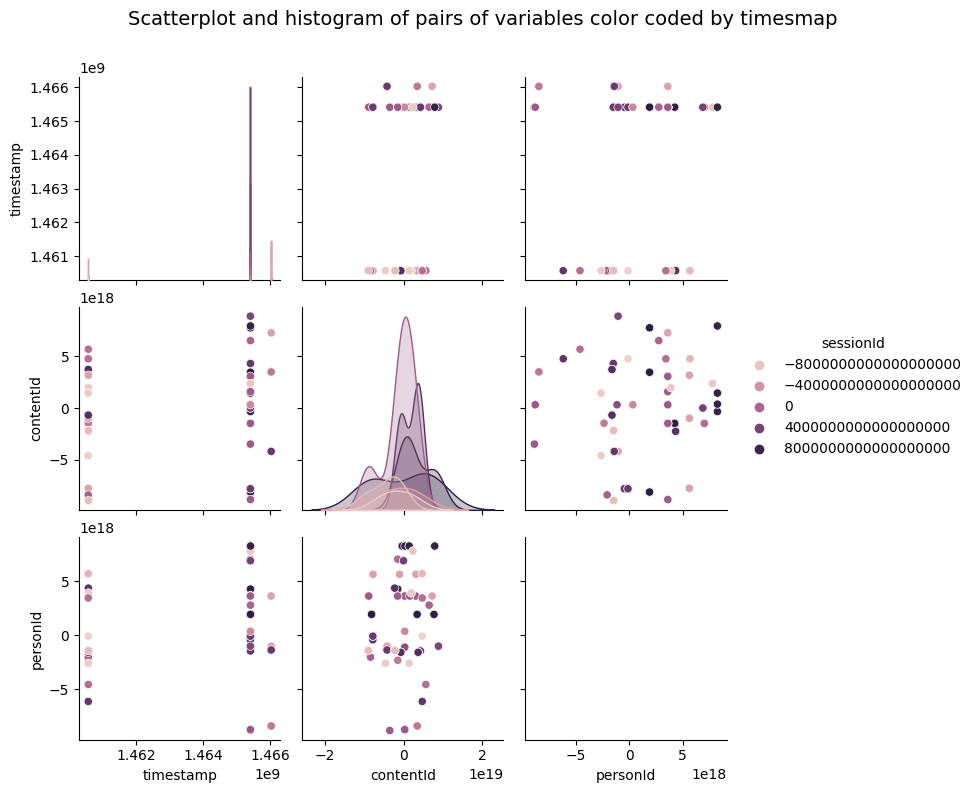

In [190]:
#Scatterplot and histogram of pairs of variables color coded by timesmap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/users_interactions.csv')
dataset.head()
g = sns.pairplot(dataset, hue='sessionId')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by timesmap",
               fontsize = 14, y=1.05);

In [191]:
dataset['timestamp'].unique()

array([1465413032, 1465412560, 1465416190, 1465413895, 1465412290,
       1465413742, 1465415950, 1465415066, 1465413762, 1465413771,
       1465413864, 1465415229, 1465415228, 1465415691, 1465413171,
       1465415259, 1465415623, 1465412288, 1465415693, 1465416196,
       1465415431, 1465415060, 1465413743, 1465415565, 1465413879,
       1465415695, 1465413954, 1465413735, 1465414324, 1465413781,
       1465415756, 1465413046, 1465415686, 1465413867, 1465413873,
       1465415690, 1465415949, 1465413845, 1465413689, 1465413946,
       1465414478, 1465413752, 1465415574, 1465414493, 1465413751,
       1465412561, 1465415430, 1465413763, 1466034854, 1466034403,
       1466033932, 1466034236, 1466034456, 1466034895, 1466033622,
       1466034855, 1466033617, 1466034780, 1466034466, 1466034457,
       1466033937, 1466034818, 1466034237, 1460566380, 1460566003,
       1460566746, 1460566250, 1460566179, 1460566517, 1460566919,
       1460568722, 1460566378, 1460566382, 1460566210, 1460567

In [241]:
#Building and Training Random of the Forest Models
y = dataset['timestamp']
X = dataset.drop(['timestamp'], axis=1)

In [202]:
#Splitting of test and train data
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [213]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=SEED)

In [195]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 62 to 73
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventType    20 non-null     object 
 1   contentId    20 non-null     float64
 2   personId     20 non-null     float64
 3   sessionId    20 non-null     float64
 4   userAgent    8 non-null      object 
 5   userRegion   8 non-null      object 
 6   userCountry  8 non-null      object 
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [248]:
#passing in the training features and labels to fit the model
from sklearn.model_selection import train_test_split
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


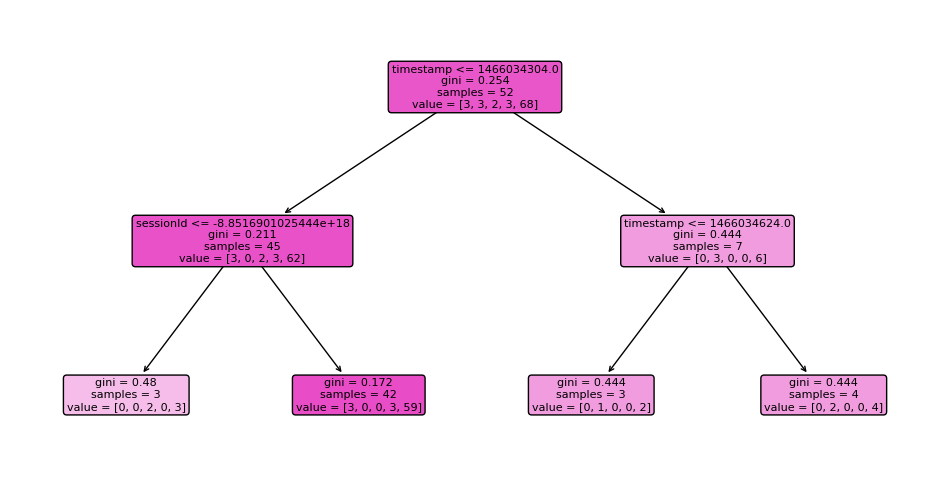

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


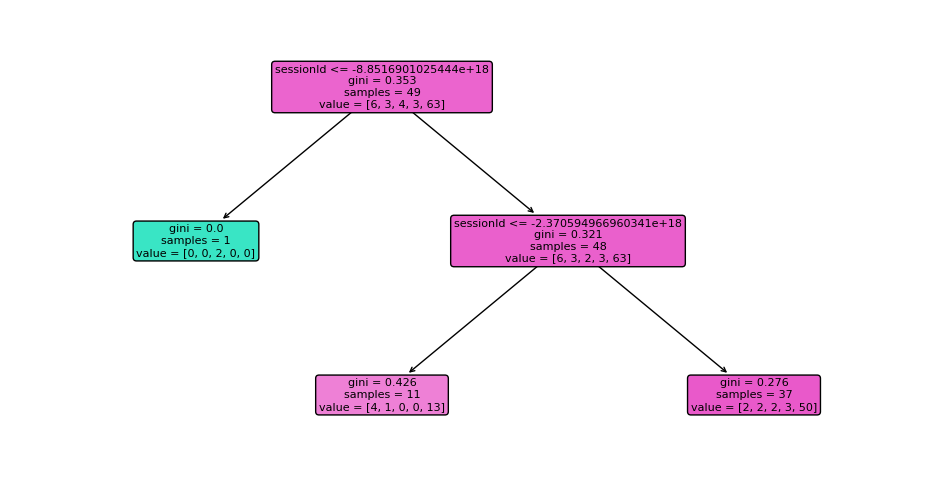

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


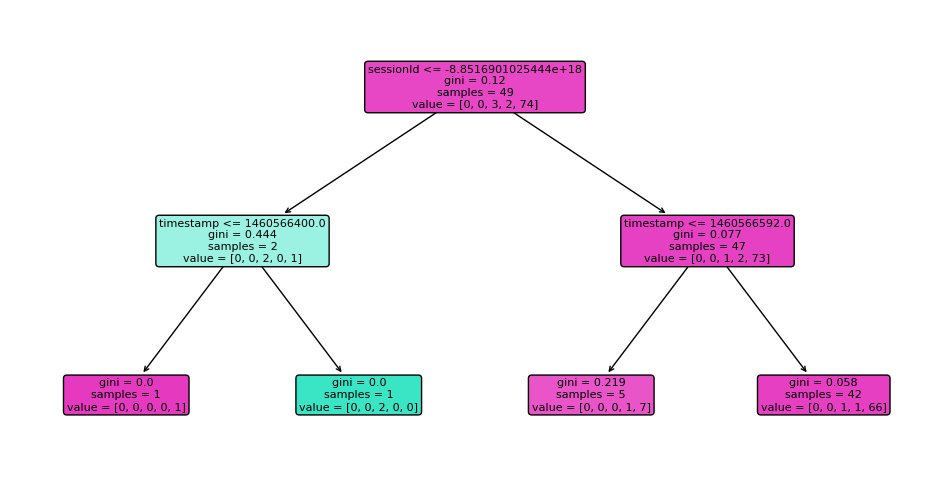

In [249]:
# Import `tree` module and rthen plot the decision tree
from sklearn import tree

features = X.columns.values

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       0.0
  1460566206       0.00      0.00      0.00       1.0
  1460566250       0.00      0.00      0.00       1.0
  1460566380       0.00      0.00      0.00       1.0
  1460566765       0.00      0.00      0.00       1.0
  1460567442       0.00      0.00      0.00       1.0
  1460570179       0.00      0.00      0.00       1.0
  1465412290       0.00      0.00      0.00       1.0
  1465413032       0.00      0.00      0.00       1.0
  1465413735       0.00      0.00      0.00       1.0
  1465413781       0.00      0.00      0.00       1.0
  1465413845       0.00      0.00      0.00       1.0
  1465413864       0.00      0.00      0.00       1.0
  1465414478       0.00      0.00      0.00       1.0
  1465415060       0.00      0.00      0.00       1.0
  1465415228       0.00      0.00      0.00       1.0
  1465415574       0.00      0.00      0.00       1.0
  1465415693       0.00    

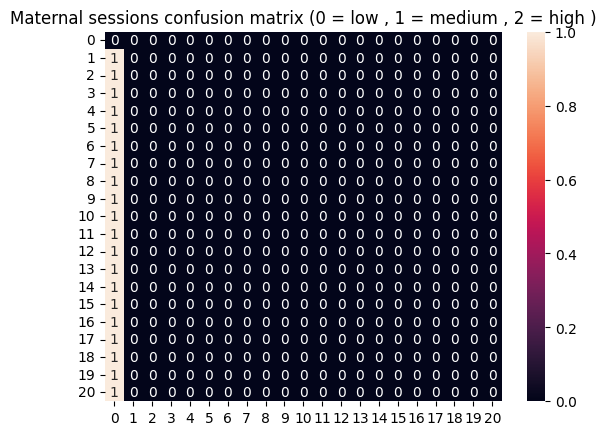

In [224]:
#Evaluating the RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal sessions confusion matrix (0 = low , 1 = medium , 2 = high )')

print(classification_report(y_test,y_pred))

In [243]:
#Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_meta_df['eventType']= label_encoder.fit_transform(test_meta_df['eventType'])


In [140]:
test_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    99 non-null     object
 1   eventType    99 non-null     int64 
 2   contentId    99 non-null     object
 3   personId     99 non-null     object
 4   sessionId    99 non-null     object
 5   userAgent    99 non-null     object
 6   userRegion   99 non-null     object
 7   userCountry  99 non-null     object
dtypes: int64(1), object(7)
memory usage: 6.3+ KB


In [235]:
test_meta_df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,4,-3.499920e+18,-8.845300e+18,1.264200e+18,NaN,NaN,NaN
1,1465412560,4,8.890720e+18,-1.032020e+18,3.621740e+18,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,4,3.105150e+17,-1.130270e+18,2.631860e+18,NaN,NaN,NaN
3,1465413895,2,3.105150e+17,3.442810e+17,-3.167640e+18,NaN,NaN,NaN
4,1465412290,4,-7.820640e+18,-4.453370e+17,5.611480e+18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
94,1460565500,4,4.761910e+18,3.429600e+18,-8.094680e+17,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_0...,SP,BR
95,1460566206,4,1.431350e+18,-2.626630e+18,-8.667090e+18,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,GA,US
96,1460566393,3,-6.929720e+17,-1.602830e+18,6.423950e+18,NaN,NaN,NaN
97,1460570179,4,-8.971090e+18,-1.443640e+18,-7.298020e+18,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR


In [245]:

X=test_meta_df[['sessionId','timestamp']]
y=test_meta_df['eventType']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [246]:
#Linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train,y_train)

y_train_hat = lr.predict(X_train)



In [162]:
print(y_train_hat)

[3.61696647 3.31789865 3.59482837 3.73186489 3.53788963 3.74751225
 3.53805623 4.04757699 3.74755256 3.41927045 3.85761483 3.53805623
 3.53805899 3.69373344 3.54469399 3.61696639 3.59482906 3.51439035
 3.73183704 3.59484589 3.54129022 3.73761751 3.73185181 3.54467777
 3.74751722 3.85810805 3.53804797 3.60326232 3.74751722 3.73184148
 3.42479629 3.65555571 3.7475173  3.42480646 4.04759221 3.53788956
 4.0241846  3.53804889 3.65350021 3.53805685 3.68690958 3.28981176
 3.54467838 3.63894982 3.31503683 3.64791825 3.31503683 3.59482914
 4.04757584 3.6387453  3.63894982 3.59483319 3.49131729 3.73989358
 3.59479869 3.73989488 3.53804912 3.89039239 3.31789904 3.41927007
 3.63876878 3.42479797 3.64791825 3.60326239 3.42480646 3.73185173
 3.57697956 3.54469391 4.04075226 3.68701055 4.04760567 4.04757622
 4.04757668 3.5769791  3.59484597 3.31503393 3.28981176 3.63876113
 3.53805547]


In [165]:
#predicting the model
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_train,y_train_hat))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_hat)))
print('R_squared:',metrics.r2_score(y_train,y_train_hat))
MAE: 1.2320965130502328
RMSE: 1.961395202197863
R_squared: 0.8544818674896206
y_test_hat = lr.predict(X_test)
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,y_test_hat))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_hat)))
print('R_squared:',metrics.r2_score(y_test,y_test_hat))

MAE: 0.6023922599963608
RMSE: 0.9378962290453797
R_squared: 0.03955711881883661
MAE: 0.5065232737274258
RMSE: 0.7191856122958828
R_squared: -0.06098039986339243
